In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.optimizers import RMSprop
from skimage import color

In [ ]:
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()
x = X_test

169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
#assigning names of labels from 0 to 99 to array 'names'...
names=['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
       'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
       'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
       'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
       'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
       'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
       'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
       'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
       'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
       'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

In [ ]:
X_train = color.rgb2gray(X_train)
Y_train = color.rgb2gray(Y_train)
X_test = color.rgb2gray(X_test)
Y_test = color.rgb2gray(Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.


In [ ]:
X_train = X_train.reshape(50000,1024)
X_test = X_test.reshape(10000,1024)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255 #chia dữ liệu về dạng 0:1 
X_test/=255

In [ ]:
Y_train = to_categorical(Y_train,100)
Y_test  = to_categorical(Y_test,100)

In [ ]:
model=Sequential()
model.add(Dense(1024,activation='relu',input_shape=(1024,)))
model.add(Dropout(0.2))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_34 (Dropout)        (None, 1024)              0         
                                                                 
 dense_41 (Dense)            (None, 256)               262400    
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_42 (Dense)            (None, 256)               65792     
                                                                 
 dropout_36 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 256)              

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=180,epochs=1000,verbose=1,validation_data=(X_test,Y_test)) #batch_size là 1 lần học chỉ học 180 #epochs là số lần học #verbose là hiển thị

Epoch 1/1000
278/278 [==============================] - 4s 10ms/step - loss: 4.5329 - accuracy: 0.0200 - val_loss: 4.4256 - val_accuracy: 0.0321
Epoch 2/1000
278/278 [==============================] - 3s 9ms/step - loss: 4.3892 - accuracy: 0.0337 - val_loss: 4.3477 - val_accuracy: 0.0419
Epoch 3/1000
278/278 [==============================] - 3s 9ms/step - loss: 4.3098 - accuracy: 0.0438 - val_loss: 4.2592 - val_accuracy: 0.0518
Epoch 4/1000
278/278 [==============================] - 2s 9ms/step - loss: 4.2537 - accuracy: 0.0524 - val_loss: 4.2153 - val_accuracy: 0.0641
Epoch 5/1000
278/278 [==============================] - 2s 9ms/step - loss: 4.2249 - accuracy: 0.0561 - val_loss: 4.1964 - val_accuracy: 0.0677
Epoch 6/1000
278/278 [==============================] - 3s 9ms/step - loss: 4.2014 - accuracy: 0.0592 - val_loss: 4.1699 - val_accuracy: 0.0694
Epoch 7/1000
278/278 [==============================] - 3s 9ms/step - loss: 4.1746 - accuracy: 0.0644 - val_loss: 4.1437 - val_accuracy

In [ ]:
#from keras.models import load_model
#model_cifar10 = load_model('CNN_cifar10.h5')
model.save('ANN_cifar100.h5')

lawn_mower


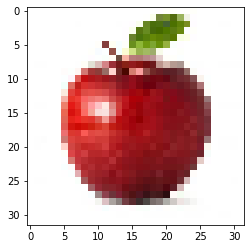

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
from skimage import color
img = load_img('3.jpg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = color.rgb2gray(img)
img = img.reshape(1,1024) 
img = img.astype('float32')
img = img/255
print(names[np.argmax(model.predict(img))])

313/313 [==============================] - 2s 7ms/step - loss: 3.7361 - accuracy: 0.1763
Test loss=  3.7361462116241455
Test accuracy=  0.17630000412464142


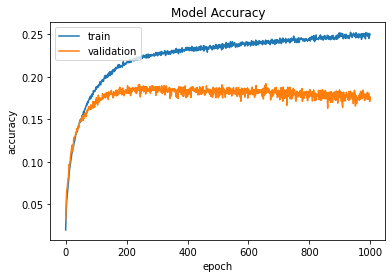

In [ ]:
score = model.evaluate(X_test,Y_test,verbose=1)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')